# Smile for dummies (Python Version)

> Professor: Dr. Gustavo Monteiro de Athayde  
> Monitor: Sylvio X. Azevedo Neto - <<sylvioxan@insper.edu.br>>  
> Date: 15/05/2025

In [7]:
from scipy.stats import norm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Defining initial parameters

fwd = 70                # Forward
t = 1                   # Time to maturity
Rf = 0.05               # Risk-free rate

# create strike array from 1 to 200
strikes = np.arange(1, 201)

# calculate ln of strikes
ln_strikes = np.log(strikes)

In [64]:
# Here we define the Black-Scholes formula with vol
def black_scholes(fwd, strike, t, vol, Rf):    
    d1 = (np.log(fwd/strike)) / (vol * np.sqrt(t)) + (vol * np.sqrt(t)) / 2
    d2 = (np.log(fwd/strike)) / (vol * np.sqrt(t)) - (vol * np.sqrt(t)) / 2
    call = fwd * norm.cdf(d1) - (strike * np.exp(-Rf * t) * norm.cdf(d2))
    return call

In [70]:
# Inputs
bs_vol = 0.3

# calculate call prices for each strike
call_prices = black_scholes(fwd, strikes, t, bs_vol, Rf)

# generate an implied volatility array
ivs = np.linspace(10, 49.8, 200)
ivs = ivs / 100

# calculate call prices for each strike using the implied volatility
call_prices_iv = black_scholes(fwd, strikes, t, ivs, Rf)

<Axes: >

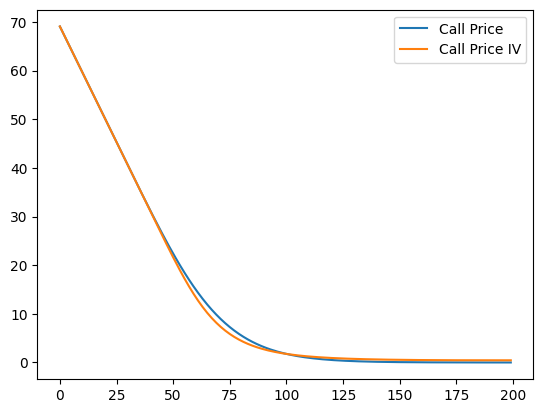

In [71]:
df = pd.DataFrame({'Strike': strikes, 'Call Price': call_prices, 'IV': ivs, 'Call Price IV': call_prices_iv})
df[['Call Price', 'Call Price IV']].plot()


<Axes: >

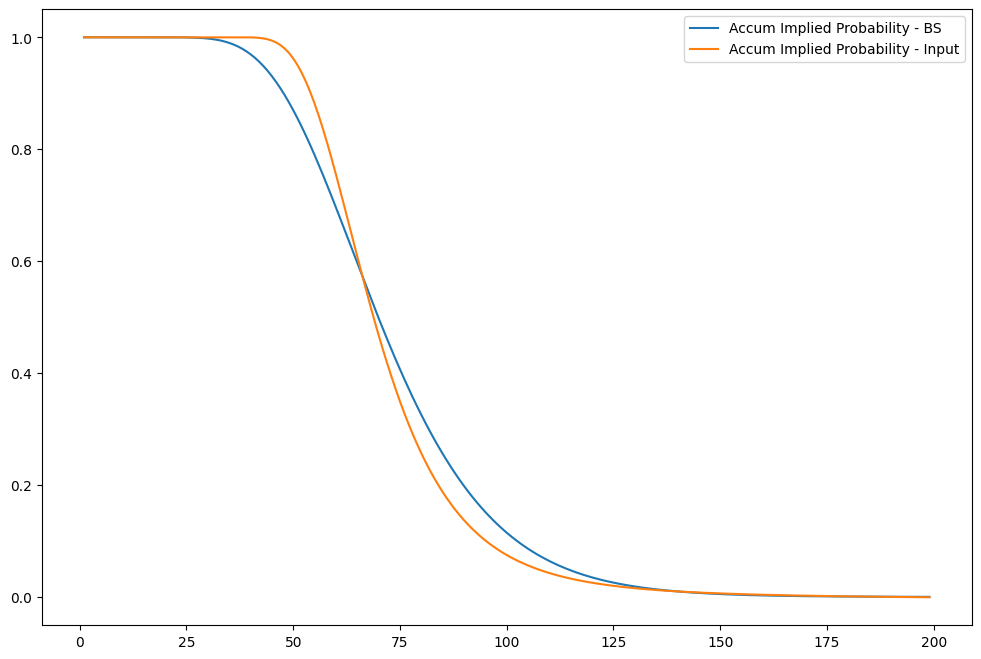

In [79]:
# Calculate the difference between the two call prices - Accumulated implied probability
df['Accum Implied Probability - BS'] = (df['Call Price'].shift(1) - df['Call Price']) * np.exp(Rf * t)
df['Accum Implied Probability - Input'] = (df['Call Price IV'].shift(1) - df['Call Price IV']) * np.exp(Rf * t)

df[['Accum Implied Probability - BS', 'Accum Implied Probability - Input']].plot(figsize=(12, 8))


<Axes: >

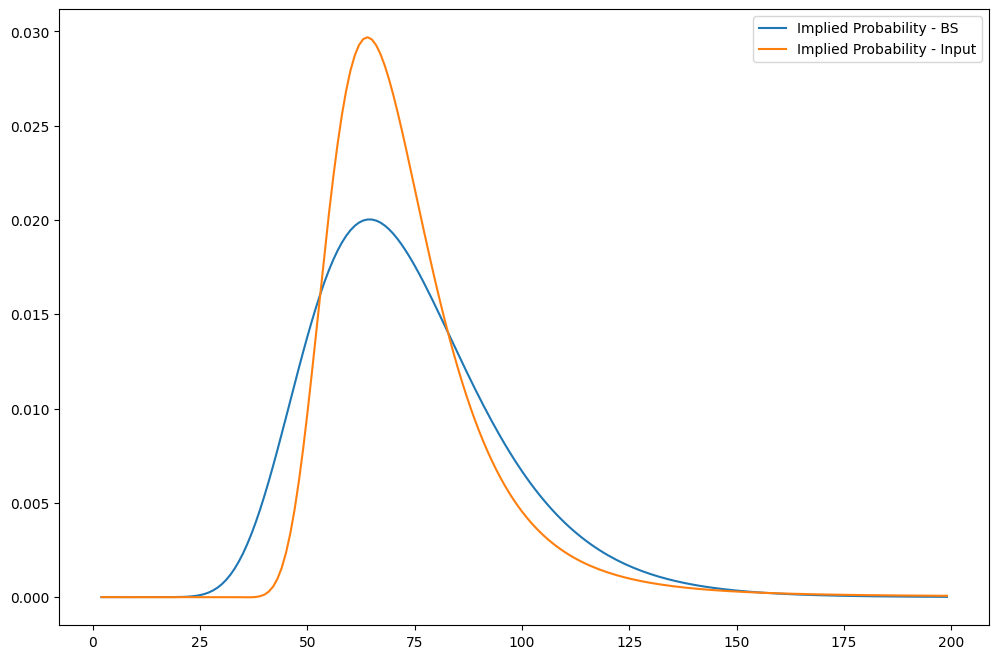

In [82]:
# Calculate the difference between the two call prices - Implied probability
df['Implied Probability - BS'] = df['Accum Implied Probability - BS'].shift(1) - df['Accum Implied Probability - BS']
df['Implied Probability - Input'] = df['Accum Implied Probability - Input'].shift(1) - df['Accum Implied Probability - Input']

df[['Implied Probability - BS', 'Implied Probability - Input']].plot(figsize=(12, 8))

C:\Users\sazevedo\AppData\Local\Temp\ipykernel_42076\1076677791.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df1[['Implied Probability - BS', 'Implied Probability - Input']][3:].plot(figsize=(12, 8))


<Axes: >

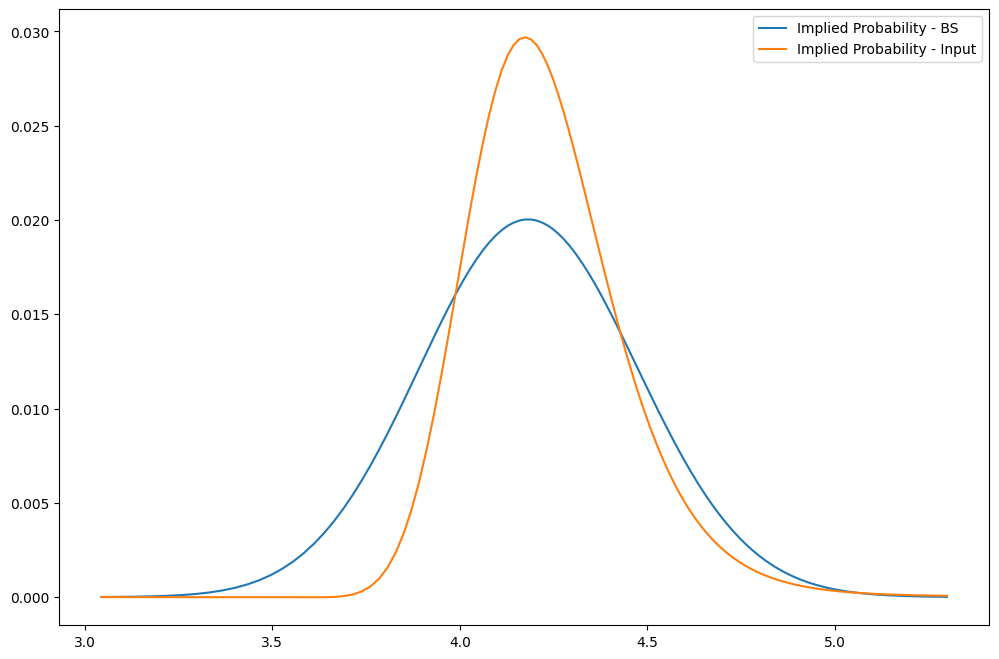

In [92]:
# plot the implied probability using log strikes
df1 = df.copy()
df1.index = ln_strikes

df1[['Implied Probability - BS', 'Implied Probability - Input']][3:].plot(figsize=(12, 8))
